<a href="https://colab.research.google.com/github/BIRAN/python_related/blob/master/W2_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install tf-nightly-2.0-preview

     |████████████████████████████████| 86.2MB 1.3MB/s 
     |████████████████████████████████| 4.3MB 34.7MB/s 
     |████████████████████████████████| 61kB 23.7MB/s 
     |████████████████████████████████| 450kB 43.0MB/s 
  Created wheel for opt-einsum: filename=opt_einsum-2.3.2-cp36-none-any.whl size=49882 sha256=4a19022b05b701908fb3d8b9ce3fdb69499361cdcfeb1bd38ded0b8260f41b56
  Stored in directory: /root/.cache/pip/wheels/51/3e/a3/b351fae0cbf15373c2136a54a70f43fea5fe91d8168a5faaa4
Successfully built opt-einsum
ERROR: tensorflow 2.0.0b1 has requirement tb-nightly<1.14.0a20190604,>=1.14.0a20190603, but you'll have tb-nightly 1.15.0a20190802 which is incompatible.
  Found existing installation: tb-nightly 1.14.0a20190603
    Uninstalling tb-nightly-1.14.0a20190603:
      Successfully uninstalled tb-nightly-1.14.0a20190603


In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.0.0-dev20190803


# DATA STEP
It shows a step-by-step process on time series data.

In [16]:
dataset = tf.data.Dataset.range(10)
for val in dataset:
   print(val.numpy())

0
1
2
3
4
5
6
7
8
9


In [17]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1)
for window_dataset in dataset:
  for val in window_dataset:
    print(val.numpy(), end=" ")
  print()

0 1 2 3 4 
1 2 3 4 5 
2 3 4 5 6 
3 4 5 6 7 
4 5 6 7 8 
5 6 7 8 9 
6 7 8 9 
7 8 9 
8 9 
9 


In [22]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
# print(type(dataset))
for window_dataset in dataset:
  # print(type(window_dataset))
  for val in window_dataset:
    print(val.numpy(), end=" ")
  print()

<class 'tensorflow.python.data.ops.dataset_ops.WindowDataset'>
0 1 2 3 4 
1 2 3 4 5 
2 3 4 5 6 
3 4 5 6 7 
4 5 6 7 8 
5 6 7 8 9 


In [36]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
# print(type(dataset))
for window in dataset:
  print(window.numpy())

[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
[5 6 7 8 9]


In [24]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
for x,y in dataset:
  print(x.numpy(), y.numpy())

[0 1 2 3] [4]
[1 2 3 4] [5]
[2 3 4 5] [6]
[3 4 5 6] [7]
[4 5 6 7] [8]
[5 6 7 8] [9]


In [28]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size=10)                             # shuffle
for x,y in dataset:
  print(x.numpy(), y.numpy())


[5 6 7 8] [9]
[3 4 5 6] [7]
[0 1 2 3] [4]
[4 5 6 7] [8]
[2 3 4 5] [6]
[1 2 3 4] [5]


In [33]:
dataset = tf.data.Dataset.range(10)  
print(type(dataset))                                                  # range dataset
dataset = dataset.window(5, shift=1, drop_remainder=True)
print(type(dataset))                                                  # window dataset
dataset = dataset.flat_map(lambda window: window.batch(5))
print(type(dataset))                                                  # flatmap dataset
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
print(type(dataset))                                                  # map dataset

dataset = dataset.shuffle(buffer_size=10)                             # shuffle the order of the dataset
dataset = dataset.batch(2).prefetch(1)                                # batch it
for x,y in dataset:
  print("x = ", x.numpy())
  print("y = ", y.numpy())
  # print(type(x))                                                    # <class 'tensorflow.python.framework.ops.EagerTensor'>
  # print(type(x.numpy()))                                            # numpy.ndarray

<class 'tensorflow.python.data.ops.dataset_ops.RangeDataset'>
<class 'tensorflow.python.data.ops.dataset_ops.WindowDataset'>
<class 'tensorflow.python.data.ops.dataset_ops.FlatMapDataset'>
<class 'tensorflow.python.data.ops.dataset_ops.MapDataset'>
x =  [[5 6 7 8]
 [3 4 5 6]]
y =  [[9]
 [7]]
x =  [[0 1 2 3]
 [4 5 6 7]]
y =  [[4]
 [8]]
x =  [[2 3 4 5]
 [1 2 3 4]]
y =  [[6]
 [5]]


# Utility functions and data step

In [0]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(False)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.1,
                    np.cos(season_time * 6 * np.pi),
                    2 / np.exp(9 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level
  
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

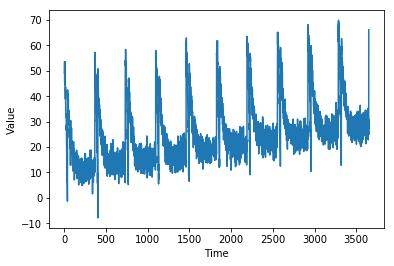

In [7]:
time = np.arange(10 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.005
noise_level = 3

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=51)

split_time = 3000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

plot_series(time, series)

# Model 1: Neural Network

In [37]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9))
model.fit(dataset,epochs=100,verbose=0)

In [0]:
forecast = []
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [14]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

3.0079825

# Model 2: Neural Network

In [0]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model2.compile(loss="mse", optimizer=optimizer)
history = model2.fit(dataset, epochs=100, callbacks=[lr_schedule], verbose=0)

In [0]:
lrs = 1e-8 * (10 ** (np.arange(100) / 20))
plt.semilogx(lrs, history.history["loss"])
plt.axis([1e-8, 1e-3, 0, 300])